# Initialization

In [22]:
import pandas as pd
import scipy.stats as sst
import scipy
import numpy
import math
%matplotlib inline

EXCEL_LOCATION = "./university data.xlsx"
UBITNAME1 = "suniluma"
PERSON_NUMBER1 = "50249002"
UBITNAME2 = "a45"
PERSON_NUMBER2 = "50244979"
UBITNAME3 ="prajnaga"
PERSON_NUMBER3 = "50244304"

df = pd.read_excel(EXCEL_LOCATION)
df.columns = ["Rank",
              "Name",
              "CS_Score",
              "Research_Overhead",
              "Base_Pay",
              "Tuition_Out_State",
              "GradStudents",
              "TTFaculty",
              "Lecturers",
              "G_TTRatio",
              "G_TTLRatio"]

print("Group members\n")
print("UBITName = {}".format(UBITNAME1))
print("personNumber = {}\n".format(PERSON_NUMBER1))
print("UBITName = {}".format(UBITNAME2))
print("personNumber = {}\n".format(PERSON_NUMBER2))
print("UBITName = {}".format(UBITNAME3))
print("personNumber = {}\n".format(PERSON_NUMBER3))

Group members

UBITName = suniluma
personNumber = 50249002

UBITName = a45
personNumber = 50244979

UBITName = prajnaga
personNumber = 50244304



# Task 1

In [23]:
def mean(df,column):
    return numpy.mean(df[column])

def variance(df,column):
    return numpy.var(df[column])
    
def stddev(df,column):
    return numpy.std(df[column])

In [24]:
mu1 = mean(df,"CS_Score")
mu2 = mean(df,"Research_Overhead")
mu3 = mean(df,"Base_Pay")
mu4 = mean(df,"Tuition_Out_State")
print("mu1 = " + str(mu1))
print("mu2 = " + str(mu2))
print("mu3 = " + str(mu3))
print("mu4 = " + str(mu4))
print("")
var1 = variance(df,"CS_Score")
var2 = variance(df,"Research_Overhead")
var3 = variance(df,"Base_Pay")
var4 = variance(df,"Tuition_Out_State")
print("var1 = " + str(var1))
print("var2 = " + str(var2))
print("var3 = " + str(var3))
print("var4 = " + str(var4))
print("")
sigma1 = stddev(df,"CS_Score")
sigma2 = stddev(df,"Research_Overhead")
sigma3 = stddev(df,"Base_Pay")
sigma4 = stddev(df,"Tuition_Out_State")
print("sigma1 = " + str(sigma1))
print("sigma2 = " + str(sigma2))
print("sigma3 = " + str(sigma3))
print("sigma4 = " + str(sigma4))

mu1 = 3.2142857142857144
mu2 = 53.385714285714286
mu3 = 469178.8163265306
mu4 = 29711.95918367347

var1 = 0.44816326530612227
var2 = 12.588163265306124
var3 = 13900134681.700962
var4 = 30727538.73302791

sigma1 = 0.6694499722205702
sigma2 = 3.5479801669831983
sigma3 = 117898.83240177132
sigma4 = 5543.24261899368


# Task 2

In [25]:
def plotter(df, column1, column2):
    return df.plot.scatter(x=column1, y=column2, style='o')

def covariance_matrix(df):
    array_like_variables = df.as_matrix().T
    return numpy.cov(array_like_variables)

def correlation_matrix(df):
    array_like_variables = df.as_matrix().T
    return numpy.corrcoef(array_like_variables)

In [26]:
covarianceMat = covariance_matrix(df[["CS_Score",
              "Research_Overhead",
              "Base_Pay",
              "Tuition_Out_State",]])
print("covarianceMat = ")
print(covarianceMat)
print("")
correlationMat = correlation_matrix(df[["CS_Score",
              "Research_Overhead",
              "Base_Pay",
              "Tuition_Out_State",]])
print("correlationMat = ")
print(correlationMat)

covarianceMat = 
[[  4.57500000e-01   1.10562500e+00   3.87978185e+03   1.05847976e+03]
 [  1.10562500e+00   1.28504167e+01   7.02793765e+04   2.80578899e+03]
 [  3.87978185e+03   7.02793765e+04   1.41897208e+10  -1.63685641e+08]
 [  1.05847976e+03   2.80578899e+03  -1.63685641e+08   3.13676958e+07]]

correlationMat = 
[[ 1.          0.4559883   0.04815316  0.27941242]
 [ 0.4559883   1.          0.16458201  0.13975105]
 [ 0.04815316  0.16458201  1.         -0.2453479 ]
 [ 0.27941242  0.13975105 -0.2453479   1.        ]]


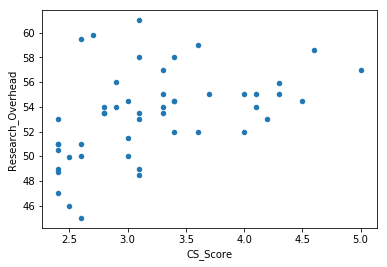

In [27]:
plotter(df,'CS_Score',"Research_Overhead")

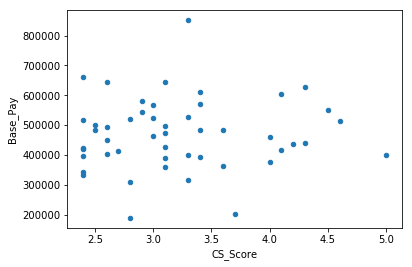

In [28]:
plotter(df,'CS_Score',"Base_Pay")

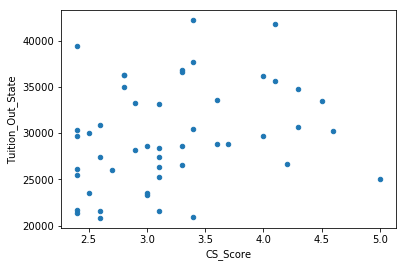

In [29]:
plotter(df,'CS_Score',"Tuition_Out_State")

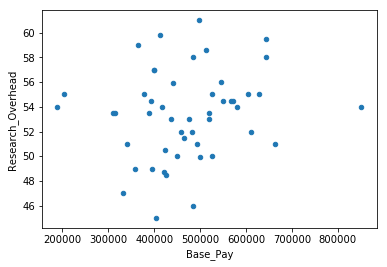

In [30]:
plotter(df,'Base_Pay',"Research_Overhead")

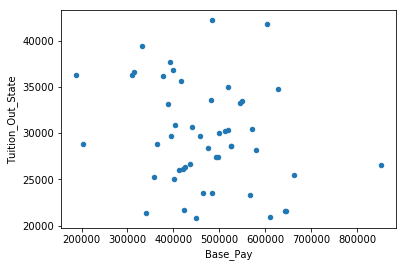

In [31]:
plotter(df,'Base_Pay',"Tuition_Out_State")

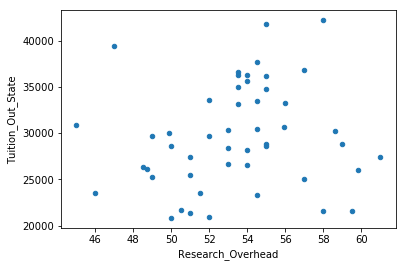

In [32]:
plotter(df,'Research_Overhead',"Tuition_Out_State")

# Task 3

In [33]:
def univariate_pdf(df,column):
    pi = numpy.pi
    sigma = stddev(df,column)
    mu = mean(df,column)
    e = numpy.e
    root2pi = numpy.sqrt(2*pi)
    return [1/(root2pi*sigma)*e**(-1/2.0*((i-mu)/sigma)**2) for i in df[column]]

def multivariate_pdf(df,no_of_columns,formula=True):
    if formula == True:
        from numpy import matrix
        covarianceMat = matrix(covarianceMat)
        inverse_covarianceMat = covarianceMat**-1
        determinant_covarianceMat = numpy.linalg.det(covarianceMat)
        mu = matrix([mu1,mu2,mu3,mu4]).T
        multivariate_list = [matrix(list(df.iloc[i][2:6])) for i in range(49)]
    else:
        from scipy.stats import multivariate_normal
        multivariate_pdf = multivariate_normal(mean=[mu1,mu2,mu3,mu4], cov=covarianceMat, allow_singular=True)
        return sum([numpy.log(multivariate_pdf.pdf(list(df.iloc[i])[2:6])) for i in range(49)])
    

In [34]:
pdf1 = univariate_pdf(df,"CS_Score")
pdf2 = univariate_pdf(df,"Research_Overhead")
pdf3 = univariate_pdf(df,"Base_Pay")
pdf4 = univariate_pdf(df,"Tuition_Out_State")

pdf_univariate = [pdf1[i]*pdf2[i]*pdf3[i]*pdf4[i] for i in range(49)]
independent_log_likelihood = sum(numpy.log(pdf_univariate))
print("logLikelihood = " + str(independent_log_likelihood))

logLikelihood = -1315.09879256


In [35]:
from scipy.stats import multivariate_normal
multivariate_pdf = multivariate_normal(mean=[mu1,mu2,mu3,mu4], cov=covarianceMat, allow_singular=True)
multivariate_log_likelihood = sum([numpy.log(multivariate_pdf.pdf(list(df.iloc[i])[2:6])) for i in range(49)])

In [36]:
print("MultivariatelogLikelihood = " + str(multivariate_log_likelihood))

MultivariatelogLikelihood = -1262.32720006


In [37]:
from numpy import matrix
covarianceMat = matrix(covarianceMat)
inverse_covarianceMat = covarianceMat**-1
determinant_covarianceMat = numpy.linalg.det(covarianceMat)
mu = matrix([mu1,mu2,mu3,mu4]).T
multivariate_list = [matrix(list(df.iloc[i][2:6])) for i in range(49)]

In [38]:
summ = 0
for i in range(49):
    x = matrix(multivariate_list[i].tolist()[0]).T
    summ += numpy.log(math.e**(-1/2.0*((x-mu).T*inverse_covarianceMat*(x-mu)).tolist()[0][0])*(1/((math.pi*2)**2*math.sqrt(determinant_covarianceMat))))

print(summ)

-1304.77824581
